In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv(r"C:\Users\Lilian\Downloads\online_retail_II.csv\online_retail_II.csv")

In [3]:
#Cleaning data
df_filtered = df_raw.copy()
df_filtered['Invoice'] = df_filtered['Invoice'].astype(str)

# Remove rows with cancelled orders
df_filtered = df_filtered[~df_filtered['Invoice'].str.startswith('C')]

df_filtered = df_filtered.dropna(subset=['Customer ID'])

df_filtered = df_filtered[df_filtered['Quantity'] > 0]

df = df_filtered.copy()

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek # Monday=0, Sunday=6
df['DayName'] = df['InvoiceDate'].dt.day_name()

C:\Users\Lilian\AppData\Local\Temp\ipykernel_16532\317446188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayName', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


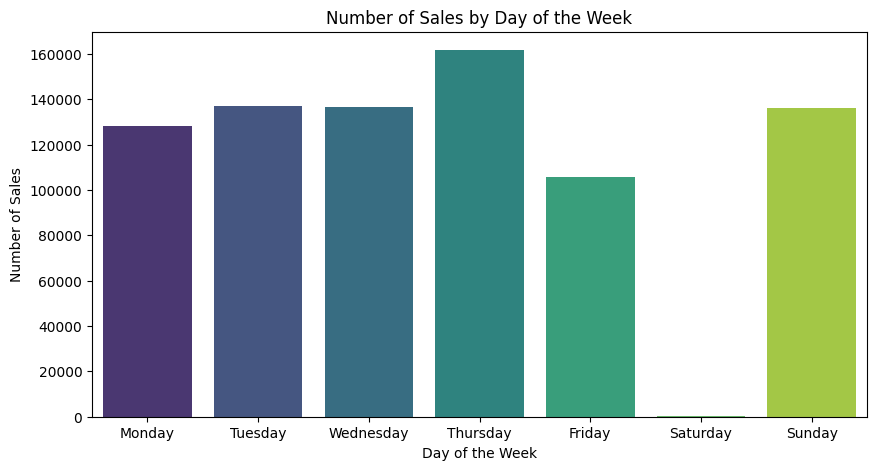

In [6]:
# 1. What is the best day for sales?
plt.figure(figsize=(10, 5))
sns.countplot(x='DayName', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Number of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')

plt.savefig('sales_by_day.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Lilian\AppData\Local\Temp\ipykernel_16532\902828173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='plasma')


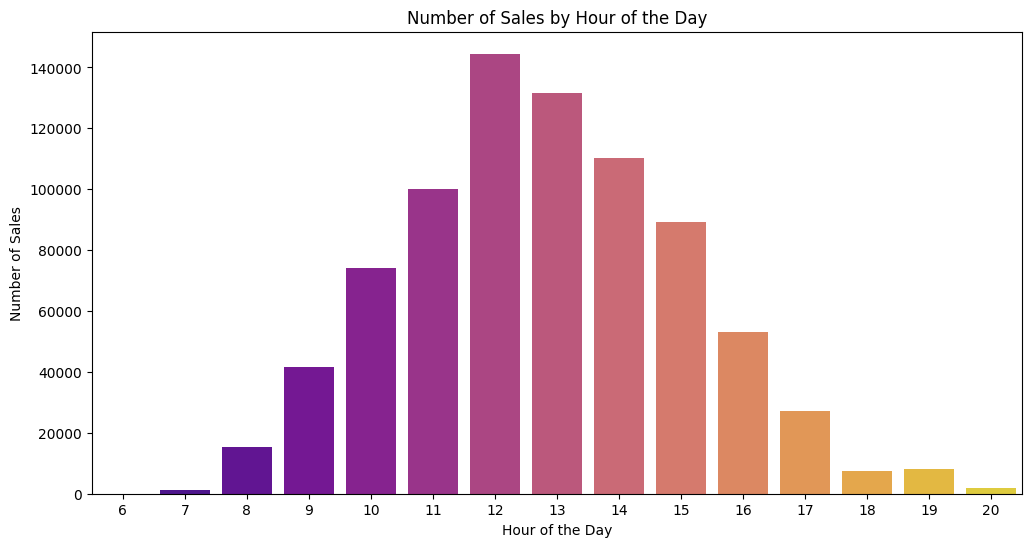

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='plasma')
plt.title('Number of Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')

plt.savefig('sales_by_hour.png', dpi=300, bbox_inches='tight')

plt.show()

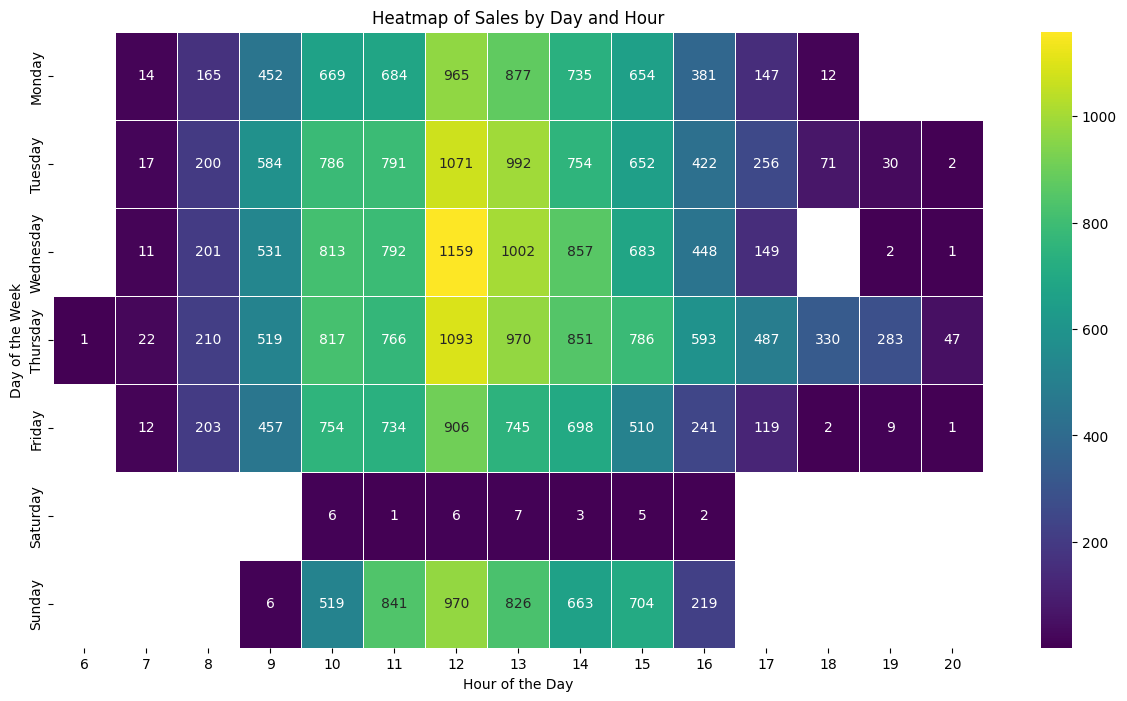

In [9]:
day_hour_sales = df.groupby(['DayName', 'Hour'])['Invoice'].nunique().unstack()
day_hour_sales = day_hour_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
sns.heatmap(day_hour_sales, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)
plt.title('Heatmap of Sales by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.savefig('sales_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()